### Importation of libraries and functions

In [1]:
from utils import *
from pathlib import Path
from IPython.display import Latex

%matplotlib inline
%load_ext lab_black

### Definition of the paths

In [2]:
data_folder = "/home/gillard/Bureau/MISP_Analysis/Back-up/WEIS2022"
output_folder = "/home/gillard/Bureau/MISP_Analysis/Back-up/WEIS2022"
image_folder = "images"
Path(f"{image_folder}").mkdir(parents=True, exist_ok=True)

### Dataframes Loading

In [3]:
EcoModel = pd.read_csv(f"{data_folder}/EcoModel.csv")

### Curation and Implementation of Conditions on the Dataframe

In [4]:
EcoModel = EcoModel[EcoModel["Analysis"] == 2]

# EcoModel = EcoModel[EcoModel["CompletionT"] > -20000000]
EcoModel["CompletionT"] = EcoModel["CompletionT"].abs()
# print(len(EcoModel["CompletionT"]))
# print(np.sum(EcoModel["CountAttr"]))

EcoModel.describe()

,Event ID,CTime,LUTime,CompletionT,OrgcID,CountAttr,InhAttr,InhPer,NTags,ThreatL,...,SimEvents,CumEvents,CumAttrs,CumInhPer,CumOrgs,CumUsers,CumTags,CumCompE,NbGalaxies,NbEventsinhisG
count,22423.000000,2.242300e+04,2.242300e+04,2.242300e+04,22423.000000,22423.000000,22423.000000,22423.000000,22423.000000,22423.000000,...,22423.000000,22423.000000,2.242300e+04,22423.000000,22423.000000,22423.000000,22423.000000,22423.000000,22423.000000,22423.000000
mean,57550.076752,1.554787e+09,1.571911e+09,1.739052e+07,1018.167819,124.160728,43.769835,0.239225,0.104937,2.529769,...,9928.707265,19317.660706,2.576638e+06,0.337446,315.943808,829.843063,1986.234045,780.241939,2.427820,1015.431744
std,35661.784041,6.569190e+07,6.223326e+07,3.848793e+07,655.234022,976.227729,352.047273,0.334930,0.650301,1.148890,...,14613.571999,12075.942390,1.816086e+06,0.161348,135.050051,305.423095,1285.133271,1407.458650,10.633621,1866.005814
min,1.000000,1.226275e+09,1.000000e+00,1.000000e+01,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,7.000000,0.000000,4.700000e+01,0.018769,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,12687.500000,1.512432e+09,1.547659e+09,6.197950e+04,291.000000,10.000000,0.000000,0.000000,0.000000,1.000000,...,1200.500000,7752.500000,5.542520e+05,0.153814,214.000000,612.000000,625.000000,0.000000,0.000000,0.000000
50%,68398.000000,1.575331e+09,1.596491e+09,1.165190e+05,1128.000000,14.000000,1.000000,0.071000,0.000000,3.000000,...,3529.000000,20689.000000,3.555683e+06,0.463839,361.000000,978.000000,2365.000000,74.000000,0.000000,0.000000
75%,88509.500000,1.603843e+09,1.608275e+09,9.094120e+06,1395.000000,32.000000,5.000000,0.333000,0.000000,3.000000,...,8816.500000,29918.500000,4.258121e+06,0.478809,422.000000,1066.000000,3015.000000,633.000000,0.000000,1044.500000
max,97941.000000,1.644278e+09,1.644338e+09,1.333411e+09,1960.000000,67599.000000,20561.000000,1.000000,26.000000,4.000000,...,74806.000000,39638.000000,4.938785e+06,0.489681,485.000000,1149.000000,3786.000000,5510.000000,49.000000,7233.000000


### 0. Binning the data per month

To bin the data in function of the creation time "CTime, I have to follow the next steps.

1. Description and definition of the needed columns for the next steps
1. Transformation "CTime" from seconds to month
1. Computation of the mean per month

### 0.1 Description and definition of the needed columns for the next steps

To apply the Ordinary Least Square (OLS) Method, I have to select the column in the main dataset EcoModel. These columns are described below

| Column n° | Name | Description | Type |
| --- | --- | --- | --- |
|   0  |   CompletionT  |   OV, Completion Time $\Delta t$ between CTime and LUTime       |   float()   |
|      |                |   in seconds                                                    |             |
| --- | --- | --- | --- |
|   1  |   InhPer       |   OV, Number of inherited attributes                            |   float()   |
|   2  |   NTags        |   OV, Number of tags for the corresponding event                |   int()     |
|   3  |   ThreatL      |   OV, Threat level (from 1 to 4)                                |   str()     |
|   4  |   SimEvent     |   OV, Number of simultaneous opened events                      |   int()     |
| --- | --- | --- | --- |
|   5  |   CumEvents    |   EV, Cumulated number of events before creation of             |   int()     |
|      |                |   the corresponding event                                       |             |
|   6  |   CumAttrs     |   EV, Cumulated number of attributes before creation of         |   int()     |
|      |                |   the corresponding event                                       |             |
|   7  |   CumInhPer    |   EV, Cumulated inherited percentage of attributes              |   float()   |
|      |                |   before creation of the corresponding event                    |             |
|   8  |   CumOrgs      |   EV, Cumulated number of contributing org before creation of   |   int()     |
|      |                |   the corresponding event                                       |             |
|   9  |   CumTags      |   EV, Cumulated number of tags before creation of               |   int()     |
|      |                |   the corresponding event                                       |             |

According to the description above, I am able to construct the new dataframe Reg_var

In [5]:
Reg_var = EcoModel[
    [
        "CTime",
        "CompletionT",
        "CountAttr",
        "InhPer",
        "NTags",
        "ThreatL",
        "SimEvents",
        "CumEvents",
        "CumAttrs",
        "CumInhPer",
        "CumOrgs",
        "CumTags",
        "CumCompE",
        "NbGalaxies",
        "NbEventsinhisG",
    ]
]

Reg_var.describe()

,CTime,CompletionT,CountAttr,InhPer,NTags,ThreatL,SimEvents,CumEvents,CumAttrs,CumInhPer,CumOrgs,CumTags,CumCompE,NbGalaxies,NbEventsinhisG
count,2.242300e+04,2.242300e+04,22423.000000,22423.000000,22423.000000,22423.000000,22423.000000,22423.000000,2.242300e+04,22423.000000,22423.000000,22423.000000,22423.000000,22423.000000,22423.000000
mean,1.554787e+09,1.739052e+07,124.160728,0.239225,0.104937,2.529769,9928.707265,19317.660706,2.576638e+06,0.337446,315.943808,1986.234045,780.241939,2.427820,1015.431744
std,6.569190e+07,3.848793e+07,976.227729,0.334930,0.650301,1.148890,14613.571999,12075.942390,1.816086e+06,0.161348,135.050051,1285.133271,1407.458650,10.633621,1866.005814
min,1.226275e+09,1.000000e+01,0.000000,0.000000,0.000000,1.000000,7.000000,0.000000,4.700000e+01,0.018769,3.000000,0.000000,0.000000,0.000000,0.000000
25%,1.512432e+09,6.197950e+04,10.000000,0.000000,0.000000,1.000000,1200.500000,7752.500000,5.542520e+05,0.153814,214.000000,625.000000,0.000000,0.000000,0.000000
50%,1.575331e+09,1.165190e+05,14.000000,0.071000,0.000000,3.000000,3529.000000,20689.000000,3.555683e+06,0.463839,361.000000,2365.000000,74.000000,0.000000,0.000000
75%,1.603843e+09,9.094120e+06,32.000000,0.333000,0.000000,3.000000,8816.500000,29918.500000,4.258121e+06,0.478809,422.000000,3015.000000,633.000000,0.000000,1044.500000
max,1.644278e+09,1.333411e+09,67599.000000,1.000000,26.000000,4.000000,74806.000000,39638.000000,4.938785e+06,0.489681,485.000000,3786.000000,5510.000000,49.000000,7233.000000


### 0.2 Transformation "CTime" from seconds to month

In [6]:
Reg_var["CTime_Month"] = seconds_to_months(Reg_var["CTime"] - min(Reg_var["CTime"]))
Reg_var

/tmp/ipykernel_331586/204243074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Reg_var["CTime_Month"] = seconds_to_months(Reg_var["CTime"] - min(Reg_var["CTime"]))


,CTime,CompletionT,CountAttr,InhPer,NTags,ThreatL,SimEvents,CumEvents,CumAttrs,CumInhPer,CumOrgs,CumTags,CumCompE,NbGalaxies,NbEventsinhisG,CTime_Month
0,1226275200,210610270,4,0.000,0,2,2666,0,47,0.078431,3,0,0,0,0,0.0
1,1238284800,156517432,19,0.000,2,2,559,1,47,0.078431,4,0,0,0,0,5.0
2,1238284800,198601017,11,0.818,0,2,2666,2,47,0.078431,4,2,0,0,0,5.0
6,1315785600,291738895,184,0.027,0,3,59830,6,47,0.078431,5,3,5,0,0,35.0
7,1316649600,115563672,114,0.202,1,2,2089,7,47,0.078431,6,3,0,0,0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39633,1644192000,51448,25,0.000,0,3,15,39633,4938197,0.457270,485,3786,156,49,0,162.0
39634,1644192000,60214,94,0.106,0,3,16,39634,4938197,0.457270,485,3786,208,49,170,162.0
39635,1644278400,30370,60,0.167,0,2,7,39635,4938785,0.457243,485,3786,209,49,7233,162.0
39636,1644278400,54633,216,0.000,0,3,9,39636,4938785,0.457243,485,3786,288,49,0,162.0


### 0.3 Computation of the mean per month

In [7]:
Months = Reg_var["CTime_Month"].value_counts()
Months = Months.keys().sort_values(ascending=True)

Mean_values = []
Percentile_5 = []
Percentile_10 = []
Percentile_25 = []
Percentile_50 = []
Percentile_75 = []
Percentile_95 = []
Percentile_99 = []

for idx, x in enumerate(Months):
    Regroup = Reg_var[Reg_var["CTime_Month"] == x]
    Mean_values.append(Regroup.mean(axis=0).tolist())
    Percentile_5.append(Regroup.quantile(0.05))
    Percentile_10.append(Regroup.quantile(0.1))
    Percentile_25.append(Regroup.quantile(0.25))
    Percentile_50.append(Regroup.quantile(0.5))
    Percentile_75.append(Regroup.quantile(0.75))
    Percentile_95.append(Regroup.quantile(0.95))
    Percentile_99.append(Regroup.quantile(0.99))

Reg_var_binned = pd.DataFrame(
    Mean_values,
    columns=[
        "CTime",
        "CompletionT",
        "CountAttr",
        "InhPer",
        "NTags",
        "ThreatL",
        "SimEvents",
        "CumEvents",
        "CumAttrs",
        "CumInhPer",
        "CumOrgs",
        "CumTags",
        "CumCompE",
        "NbGalaxies",
        "NbEventsinhisG",
        "CTime_Month",
    ],
)

P5 = pd.DataFrame(
    Percentile_5,
    columns=[
        "CTime",
        "CompletionT",
        "CountAttr",
        "InhPer",
        "NTags",
        "ThreatL",
        "SimEvents",
        "CumEvents",
        "CumAttrs",
        "CumInhPer",
        "CumOrgs",
        "CumTags",
        "CumCompE",
        "NbGalaxies",
        "NbEventsinhisG",
        "CTime_Month",
    ],
)

P10 = pd.DataFrame(
    Percentile_10,
    columns=[
        "CTime",
        "CompletionT",
        "CountAttr",
        "InhPer",
        "NTags",
        "ThreatL",
        "SimEvents",
        "CumEvents",
        "CumAttrs",
        "CumInhPer",
        "CumOrgs",
        "CumTags",
        "CumCompE",
        "NbGalaxies",
        "NbEventsinhisG",
        "CTime_Month",
    ],
)

P25 = pd.DataFrame(
    Percentile_25,
    columns=[
        "CTime",
        "CompletionT",
        "CountAttr",
        "InhPer",
        "NTags",
        "ThreatL",
        "SimEvents",
        "CumEvents",
        "CumAttrs",
        "CumInhPer",
        "CumOrgs",
        "CumTags",
        "CumCompE",
        "NbGalaxies",
        "NbEventsinhisG",
        "CumCompE",
        "NbGalaxies",
        "NbEventsinhisG",
        "CTime_Month",
    ],
)

P50 = pd.DataFrame(
    Percentile_50,
    columns=[
        "CTime",
        "CompletionT",
        "CountAttr",
        "InhPer",
        "NTags",
        "ThreatL",
        "SimEvents",
        "CumEvents",
        "CumAttrs",
        "CumInhPer",
        "CumOrgs",
        "CumTags",
        "CumCompE",
        "NbGalaxies",
        "NbEventsinhisG",
        "CTime_Month",
    ],
)

P75 = pd.DataFrame(
    Percentile_75,
    columns=[
        "CTime",
        "CompletionT",
        "CountAttr",
        "InhPer",
        "NTags",
        "ThreatL",
        "SimEvents",
        "CumEvents",
        "CumAttrs",
        "CumInhPer",
        "CumOrgs",
        "CumTags",
        "CumCompE",
        "NbGalaxies",
        "NbEventsinhisG",
        "CTime_Month",
    ],
)

P95 = pd.DataFrame(
    Percentile_95,
    columns=[
        "CTime",
        "CompletionT",
        "CountAttr",
        "InhPer",
        "NTags",
        "ThreatL",
        "SimEvents",
        "CumEvents",
        "CumAttrs",
        "CumInhPer",
        "CumOrgs",
        "CumTags",
        "CumCompE",
        "NbGalaxies",
        "NbEventsinhisG",
        "CTime_Month",
    ],
)

P99 = pd.DataFrame(
    Percentile_99,
    columns=[
        "CTime",
        "CompletionT",
        "CountAttr",
        "InhPer",
        "NTags",
        "ThreatL",
        "SimEvents",
        "CumEvents",
        "CumAttrs",
        "CumInhPer",
        "CumOrgs",
        "CumTags",
        "CumCompE",
        "NbGalaxies",
        "NbEventsinhisG",
        "CTime_Month",
    ],
)

### 0.4 Plot CTime vs CompletionT binned per month

### 0.4.1 Exponential Fit

In [8]:
import piecewise_regression

Fit = Reg_var_binned[(Reg_var_binned["CTime_Month"] > 40)]
y = np.log10(Fit["CompletionT"]).tolist()

reg = piecewise_regression.Fit(Fit["CTime_Month"].tolist(), y, n_breakpoints=1)
print(reg.summary())


                    Breakpoint Regression Results                     
No. Observations                      122
No. Model Parameters                    4
Degrees of Freedom                    118
Res. Sum of Squares               8.13965
Total Sum of Squares              64.4023
R Squared                        0.873612
Adjusted R Squared               0.869292
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const                7.64361       0.0983       77.755     3.23e-103       7.4489       7.8383
alpha1          -0.000999807      0.00112     -0.89169         0.374   -0.0032202    0.0012206
beta1             -0.0683792      0.00454      -15.073             -    -0.077363    -0.059396
breakpoint1          127.606         1.53            -             -       124.57       130.64
-----------------

### 0.4.2 Plot

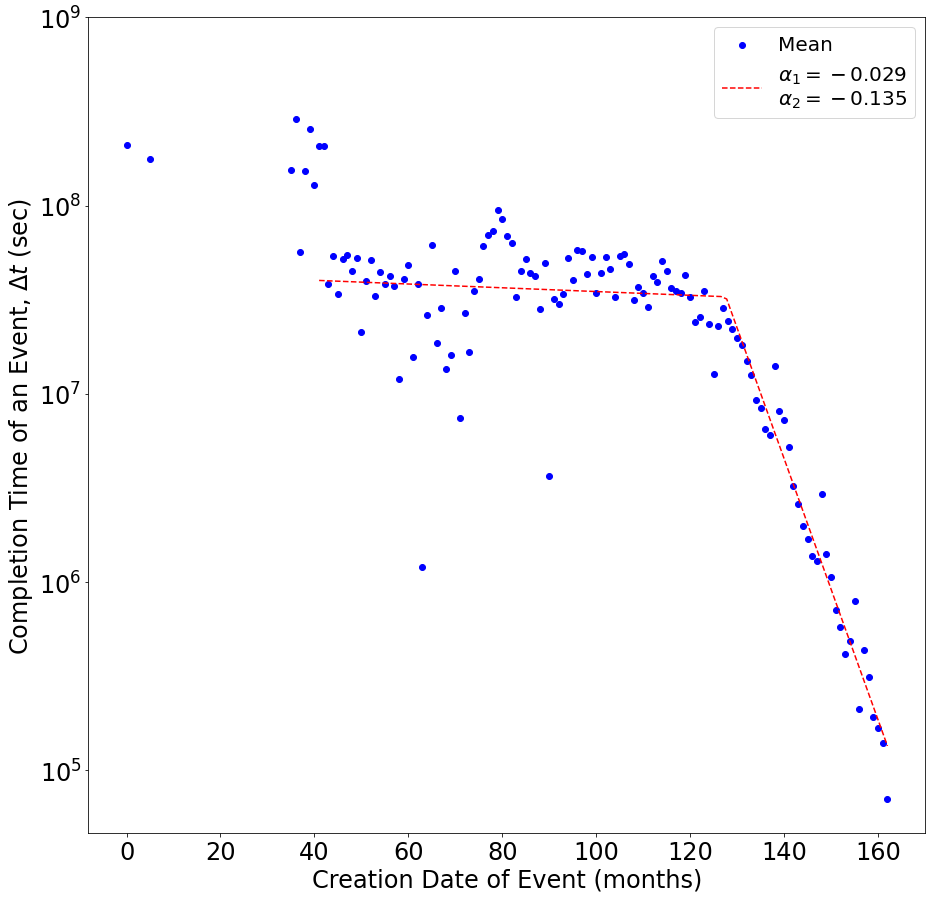

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.scatter(
    Reg_var_binned["CTime_Month"],
    np.log10(Reg_var_binned["CompletionT"]),
    color="blue",
    label="Mean",
)
reg.plot_fit(
    color="red", ls="--", label=r"$\alpha_1 = -0.029$" + "\n" + r"$\alpha_2 = -0.135$"
)

ax.set_yticks([5, 6, 7, 8, 9])
ax.set_yticklabels([r"$10^5$", r"$10^6$", r"$10^7$", r"$10^8$", r"$10^9$"])

ax.set_xlabel("Creation Date of Event (months)", fontsize=24)
ax.set_ylabel(r"Completion Time of an Event, $\Delta t$ (sec)", fontsize=24)
ax.xaxis.set_tick_params(labelsize=24)
ax.yaxis.set_tick_params(labelsize=24)
ax.legend(fontsize=20)

# changer les axes

### 0.5 Plot CTime vs CompletionT binned per month: Percentile

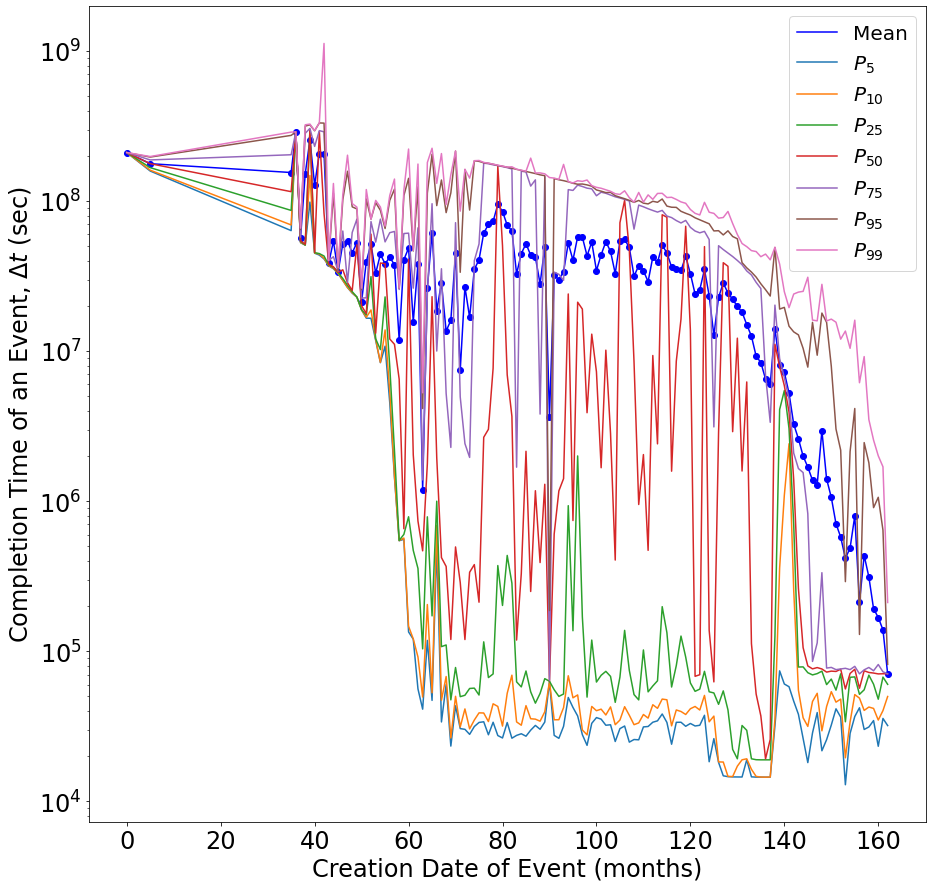

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.scatter(Reg_var_binned["CTime_Month"], Reg_var_binned["CompletionT"], color="blue")
ax.plot(
    Reg_var_binned["CTime_Month"],
    Reg_var_binned["CompletionT"],
    color="blue",
    label="Mean",
)
ax.plot(P5["CTime_Month"], P5["CompletionT"], label=r"$P_{5}$")
ax.plot(P10["CTime_Month"], P10["CompletionT"], label=r"$P_{10}$")
ax.plot(P25["CTime_Month"], P25["CompletionT"], label=r"$P_{25}$")
ax.plot(P50["CTime_Month"], P50["CompletionT"], label=r"$P_{50}$")
ax.plot(P75["CTime_Month"], P75["CompletionT"], label=r"$P_{75}$")
ax.plot(P95["CTime_Month"], P95["CompletionT"], label=r"$P_{95}$")
ax.plot(P99["CTime_Month"], P99["CompletionT"], label=r"$P_{99}$")
ax.set_xlabel("Creation Date of Event (months)", fontsize=24)
ax.set_ylabel(r"Completion Time of an Event, $\Delta t$ (sec)", fontsize=24)
ax.xaxis.set_tick_params(labelsize=24)
ax.yaxis.set_tick_params(labelsize=24)
ax.set_yscale("log")
ax.legend(fontsize=20)

### 0.6 Drop some useless columns of the dataset used for the model

In [11]:
# Reg_var_binned = Reg_var_binned.drop("CTime", axis=1)
# Reg_var_binned = Reg_var_binned.drop("CTime_Month", axis=1)
# Reg_var_binned

## 1. Exploratory Analysis of the Dataframe

Before going through the OLS, I have to visually check if there are multicollinearity. To do that, I preliminarily produce pairplot of each pair of values within the dataframe and the correlation matrix.

### 1.1 Pairplot 

In [12]:
%%script echo skipping

PPlotdf = Reg_var_binned
PPlotdf["CompletionT"] = PPlotdf["CompletionT"] / 1e8
PPlotdf["CumAttrs"] = PPlotdf["CumAttrs"] / 1e6

sns.set(font_scale=1.5)
b = sns.pairplot(PPlotdf, corner=True)
plt.show()

skipping


### 1.2 Correlation Matrix

In [13]:
%%script echo skipping

corrM = Reg_var_binned.corr()
corrM

skipping


### 1.3 Computation of the Multicollinearity

To do that, I use the value of variance inflation factor (VFI), given by:

\begin{align}
\textrm{VIF} = \frac{1}{1- R^2}
\end{align}

If $\textrm{VIF} > 10 \Rightarrow \textrm{Evidence of Multicollinearity}$

In [14]:
# Reg_var_binned["CumInhPer"] = np.exp(Reg_var_binned["CumInhPer"])

# VIF dataframe
data = EcoModel[
    [
        # "CompletionT",
        "CountAttr",
        "InhPer",
        "NTags",
        "ThreatL",
        "SimEvents",
        "CumEvents",
        "CumAttrs",
        "CumInhPer",
        "CumOrgs",
        "CumTags",
        "CumCompE",
        "NbGalaxies",
        "NbEventsinhisG",
    ]
]

vif_data = pd.DataFrame()
vif_data["feature"] = data.columns

# calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(data.values, i) for i in range(len(data.columns))
]

vif_data

,feature,VIF
0,CountAttr,1.024337
1,InhPer,1.882068
2,NTags,1.060018
3,ThreatL,10.554830
4,SimEvents,2.003210
5,CumEvents,398.160195
6,CumAttrs,396.851938
7,CumInhPer,174.260188
8,CumOrgs,257.698854
9,CumTags,556.725148


### 1.3 Creation of all possible Combinations of Parameters

This can be made according to the Table §0.1

In [15]:
Combinations = []
nb_parameters = data.shape[1]
list_param = range(0, nb_parameters)

for idk, k in enumerate(list_param):
    comb = combinations(list_param, k + 1)
    for i in list(comb):
        Combinations.append(list(i))

### 1.4 Computation

In [16]:
%%script echo skipping
Y = EcoModel[["CompletionT"]]
Keep_Comb = []
Rsquared = []
for idc, c in enumerate(Combinations):
    X = pd.DataFrame.empty
    for idv, v in enumerate(c):
        if idv == 0:
            X = data.iloc[:, v].to_frame()
        else:
            X.insert(idv, str(data.columns[v]), data.iloc[:, v])
    K = X
    # X -= np.average(X)
    X = ssm.add_constant(X)
    model = ssm.OLS(Y, X).fit()
    predictions = model.summary()
    rsquared = model.rsquared

    if len(K.columns) > 1:
        vif_data = pd.DataFrame()
        vif_data["feature"] = K.columns

        # calculating VIF for each feature
        vif_data["VIF"] = [
            variance_inflation_factor(K.values, i) for i in range(len(K.columns))
        ]

    corrM = X.corr()

    if rsquared > 0.81 and len(K.columns) > 1:
        if len(vif_data[vif_data["VIF"] > 10]) == 0:
            Rsquared.append(np.round(model.rsquared, 3))
            Keep_Comb.append(idc)
            print(predictions)
            print("CorrM: ", corrM)
            print(vif_data)
            try:
                white_test = het_white(model.resid, model.model.exog)
                labels = [
                    "Test Statistic",
                    "Test Statistic p-value",
                    "F-Statistic",
                    "F-Test p-value",
                ]
                print(dict(zip(labels, white_test)))
            except:
                pass
print(max(Rsquared))

skipping


### Selected Model for CompletionT

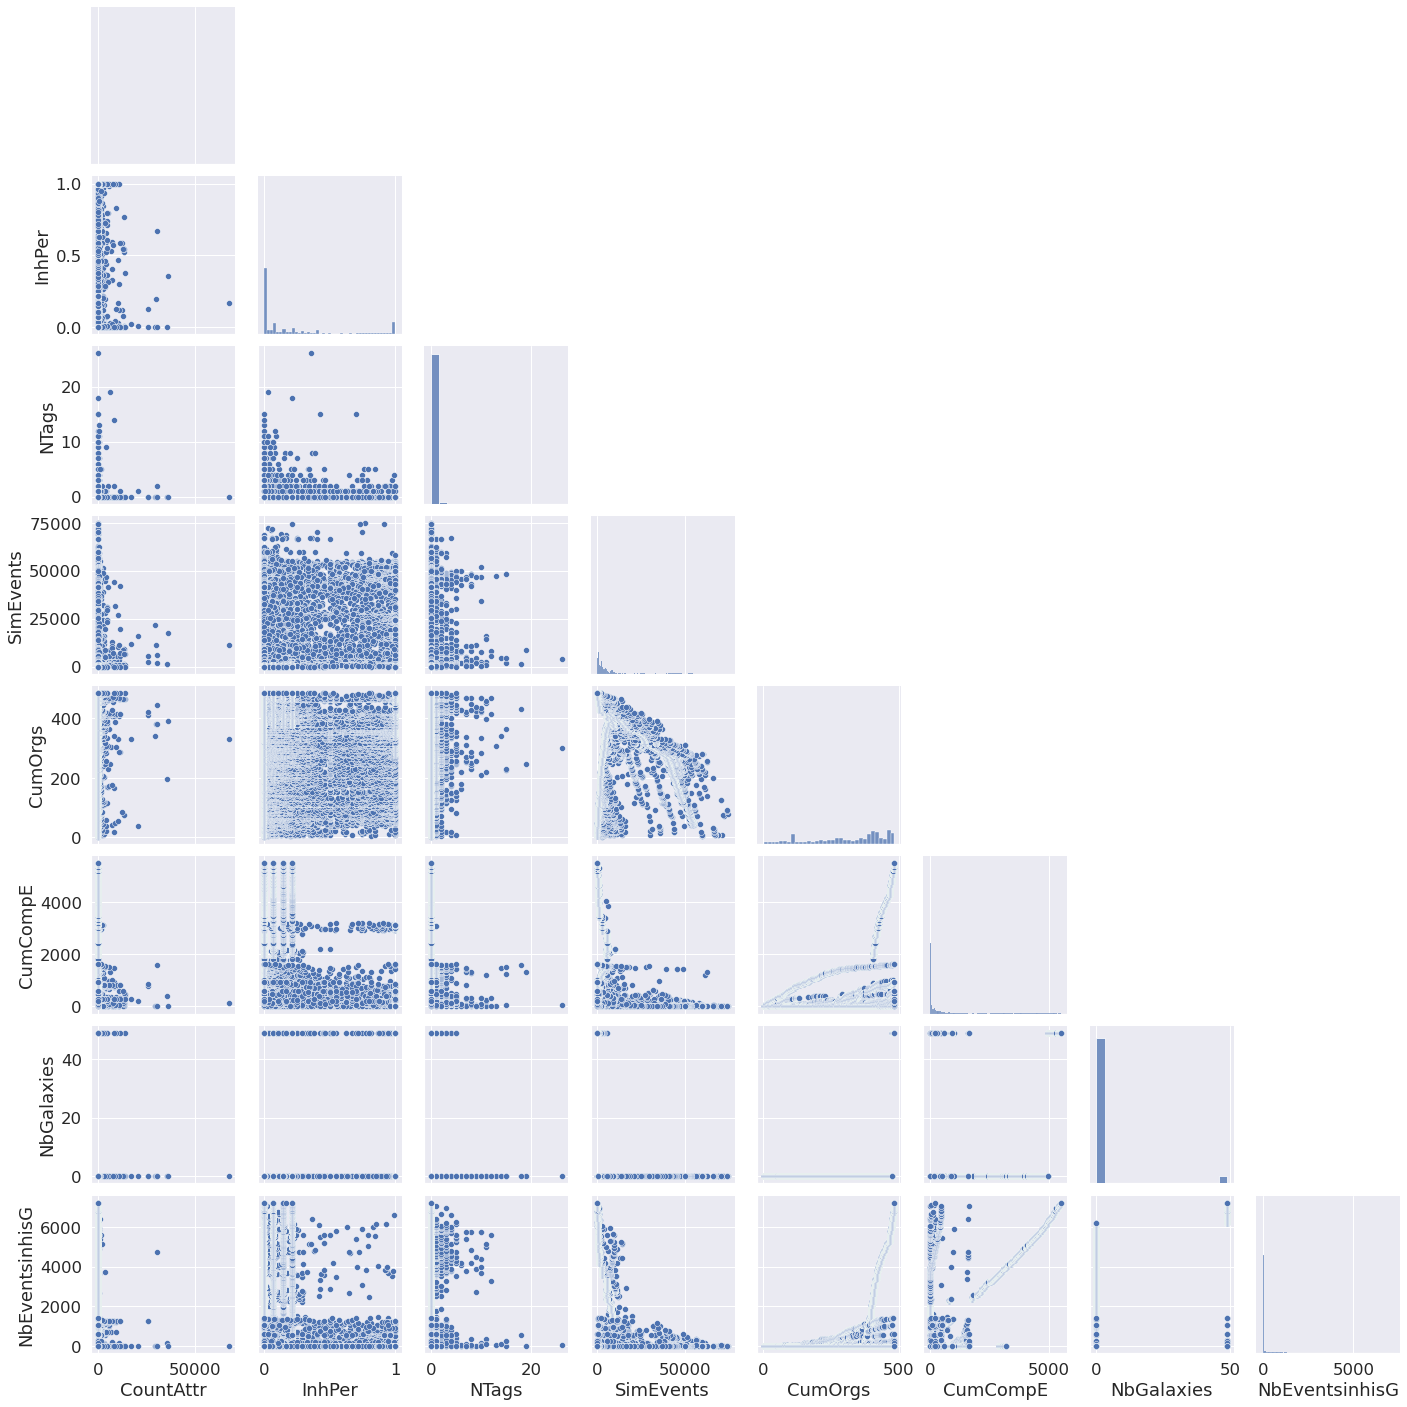

In [17]:
data = EcoModel[
    [
        # "CompletionT",
        "CountAttr",
        "InhPer",
        "NTags",
        # "ThreatL",
        "SimEvents",
        # "CumEvents",
        # "CumAttrs",
        # "CumInhPer",
        "CumOrgs",
        # "CumTags",
        "CumCompE",
        "NbGalaxies",
        "NbEventsinhisG",
    ]
]

sns.set(font_scale=1.5)
b = sns.pairplot(data, corner=True)
plt.show()

In [18]:
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns

# calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(data.values, i) for i in range(len(data.columns))
]

vif_data

,feature,VIF
0,CountAttr,1.022505
1,InhPer,1.656221
2,NTags,1.046032
3,SimEvents,1.375658
4,CumOrgs,2.886816
5,CumCompE,5.340562
6,NbGalaxies,1.215064
7,NbEventsinhisG,5.725633


In [19]:
Y = EcoModel[["CompletionT"]]
X = data
# X -= np.average(X)
X = ssm.add_constant(X)
model = ssm.OLS(Y, X).fit()
predictions = model.summary()
print(predictions)

                            OLS Regression Results                            
Dep. Variable:            CompletionT   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                 1.334e+04
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        12:35:12   Log-Likelihood:            -4.0382e+05
No. Observations:               22423   AIC:                         8.077e+05
Df Residuals:                   22414   BIC:                         8.077e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.122e+07   3.23e+05     34.

In [20]:
try:
    white_test = het_white(model.resid, model.model.exog)
    labels = [
        "Test Statistic",
        "Test Statistic p-value",
        "F-Statistic",
        "F-Test p-value",
    ]
    print(dict(zip(labels, white_test)))
except:
    pass

{'Test Statistic': 92.09388728250077, 'Test Statistic p-value': 1.9813404484919623e-05, 'F-Statistic': 2.1463309098538463, 'F-Test p-value': 1.9295387350109735e-05}


### Combination CompletionT Log

In [21]:
LogEco = np.log(EcoModel)

LogEco = LogEco.replace(-np.inf, 1e-50)

data = LogEco[
    [
        # "CompletionT",
        "CountAttr",
        "InhPer",
        "NTags",
        "ThreatL",
        "SimEvents",
        "CumEvents",
        "CumAttrs",
        "CumInhPer",
        "CumOrgs",
        "CumTags",
        "CumCompE",
        "NbGalaxies",
        "NbEventsinhisG",
    ]
]
LogEco

corrM = data.corr()
corrM

/home/gillard/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,CountAttr,InhPer,NTags,ThreatL,SimEvents,CumEvents,CumAttrs,CumInhPer,CumOrgs,CumTags,CumCompE,NbGalaxies,NbEventsinhisG
CountAttr,1.000000,-0.272388,0.083523,0.053929,0.064233,-0.028025,-0.017047,-0.021083,-0.030412,-0.029306,0.023326,0.006581,-0.002649
InhPer,-0.272388,1.000000,-0.058704,0.074724,0.010448,0.050574,0.045539,0.063829,0.050516,0.054363,-0.021597,-0.068373,-0.067058
NTags,0.083523,-0.058704,1.000000,-0.047011,0.038368,0.009613,0.001861,-0.013097,0.014730,0.016154,0.012663,-0.018409,0.072990
ThreatL,0.053929,0.074724,-0.047011,1.000000,0.237826,-0.307490,-0.292690,-0.381926,-0.262965,-0.291075,-0.366401,-0.130668,-0.779134
SimEvents,0.064233,0.010448,0.038368,0.237826,1.000000,-0.032300,-0.005021,-0.084257,0.020815,0.003981,-0.530821,-0.423968,-0.114081
CumEvents,-0.028025,0.050574,0.009613,-0.307490,-0.032300,1.000000,0.969056,0.874731,0.991008,0.976802,0.359646,0.214051,0.452811
CumAttrs,-0.017047,0.045539,0.001861,-0.292690,-0.005021,0.969056,1.000000,0.878971,0.960654,0.929453,0.337060,0.178368,0.425901
CumInhPer,-0.021083,0.063829,-0.013097,-0.381926,-0.084257,0.874731,0.878971,1.000000,0.833754,0.850701,0.322427,0.177146,0.461099
CumOrgs,-0.030412,0.050516,0.014730,-0.262965,0.020815,0.991008,0.960654,0.833754,1.000000,0.975846,0.334226,0.189411,0.424393
CumTags,-0.029306,0.054363,0.016154,-0.291075,0.003981,0.976802,0.929453,0.850701,0.975846,1.000000,0.352422,0.191259,0.452564


In [22]:
Combinations = []
nb_parameters = data.shape[1]
list_param = range(0, nb_parameters)

for idk, k in enumerate(list_param):
    comb = combinations(list_param, k + 1)
    for i in list(comb):
        Combinations.append(list(i))

In [23]:
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns

# calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(data.values, i) for i in range(len(data.columns))
]

vif_data

,feature,VIF
0,CountAttr,5.540545
1,InhPer,1.701946
2,NTags,1.036428
3,ThreatL,8.876290
4,SimEvents,57.537325
5,CumEvents,5377.101536
6,CumAttrs,1695.173972
7,CumInhPer,15.604611
8,CumOrgs,5133.836554
9,CumTags,698.504290


In [24]:
Y = LogEco[["CompletionT"]]
Keep_Comb = []
Rsquared = []
for idc, c in enumerate(Combinations):
    X = pd.DataFrame.empty
    for idv, v in enumerate(c):
        if idv == 0:
            X = data.iloc[:, v].to_frame()
        else:
            X.insert(idv, str(data.columns[v]), data.iloc[:, v])
    K = X
    # X -= np.average(X)
    X = ssm.add_constant(X)
    model = ssm.OLS(Y, X).fit()
    predictions = model.summary()
    rsquared = model.rsquared

    if len(K.columns) > 1:
        vif_data = pd.DataFrame()
        vif_data["feature"] = K.columns

        # calculating VIF for each feature
        vif_data["VIF"] = [
            variance_inflation_factor(K.values, i) for i in range(len(K.columns))
        ]

    corrM = X.corr()

    if rsquared > 0.5 and len(K.columns) > 1:
        if len(vif_data[vif_data["VIF"] > 10]) == 0:
            Rsquared.append(np.round(model.rsquared, 3))
            Keep_Comb.append(idc)
            print(predictions)
            print("CorrM: ", corrM)
            print(vif_data)
            try:
                white_test = het_white(model.resid, model.model.exog)
                labels = [
                    "Test Statistic",
                    "Test Statistic p-value",
                    "F-Statistic",
                    "F-Test p-value",
                ]
                print(dict(zip(labels, white_test)))
            except:
                pass
print(len(Rsquared))

                            OLS Regression Results                            
Dep. Variable:            CompletionT   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                 1.364e+04
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        12:35:14   Log-Likelihood:                -47338.
No. Observations:               22423   AIC:                         9.468e+04
Df Residuals:                   22420   BIC:                         9.471e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4453      0.075     19.268      0.0

KeyboardInterrupt: 

### Selected Model for CompletionT Log

/home/gillard/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


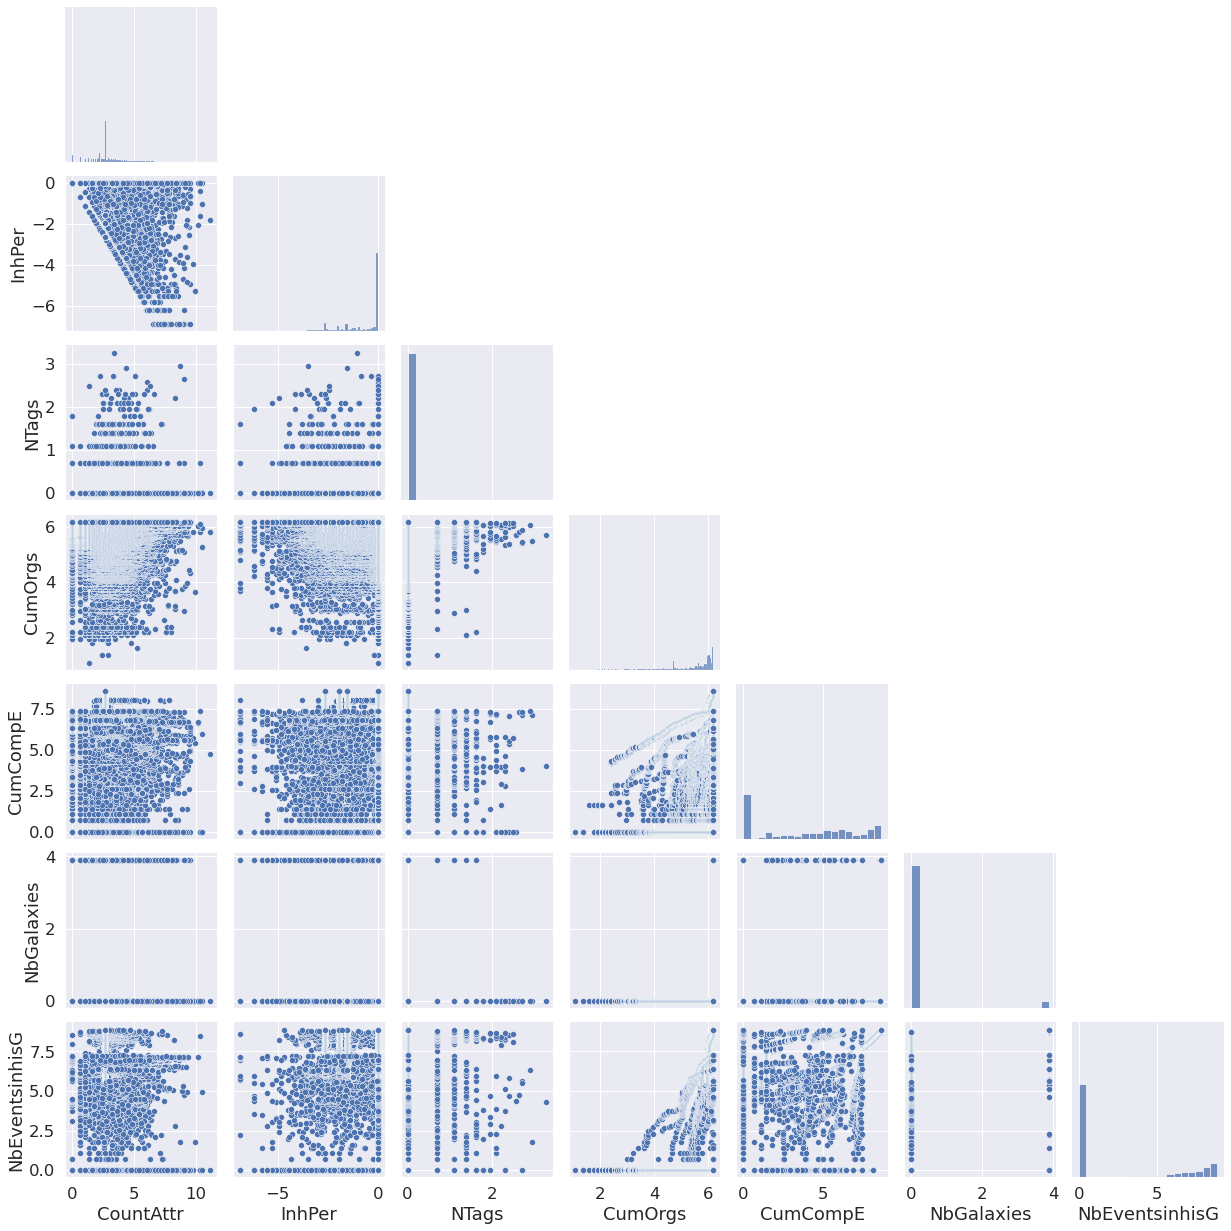

In [31]:
LogEco = np.log(EcoModel)

LogEco = LogEco.replace(-np.inf, 1e-50)

data = LogEco[
    [
        # "CompletionT",
        "CountAttr",
        "InhPer",
        "NTags",
        # "ThreatL",
        # "SimEvents",
        # "CumEvents",
        # "CumAttrs",
        # "CumInhPer",
        "CumOrgs",
        # "CumTags",
        "CumCompE",
        "NbGalaxies",
        "NbEventsinhisG",
    ]
]
LogEco

sns.set(font_scale=1.5)
b = sns.pairplot(data, corner=True)
plt.show()

In [29]:
corrM = data.corr()
corrM

,CompletionT,CountAttr,InhPer,NTags,CumOrgs,CumCompE,NbGalaxies,NbEventsinhisG
CompletionT,1.000000,0.113835,-0.070317,0.070970,-0.227852,-0.601116,-0.158419,-0.119952
CountAttr,0.113835,1.000000,-0.272388,0.083523,-0.030412,0.023326,0.006581,-0.002649
InhPer,-0.070317,-0.272388,1.000000,-0.058704,0.050516,-0.021597,-0.068373,-0.067058
NTags,0.070970,0.083523,-0.058704,1.000000,0.014730,0.012663,-0.018409,0.072990
CumOrgs,-0.227852,-0.030412,0.050516,0.014730,1.000000,0.334226,0.189411,0.424393
CumCompE,-0.601116,0.023326,-0.021597,0.012663,0.334226,1.000000,0.227860,0.430461
NbGalaxies,-0.158419,0.006581,-0.068373,-0.018409,0.189411,0.227860,1.000000,0.144851
NbEventsinhisG,-0.119952,-0.002649,-0.067058,0.072990,0.424393,0.430461,0.144851,1.000000


In [32]:
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns

# calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(data.values, i) for i in range(len(data.columns))
]

vif_data

,feature,VIF
0,CountAttr,5.145818
1,InhPer,1.666971
2,NTags,1.031452
3,CumOrgs,6.727752
4,CumCompE,3.284646
5,NbGalaxies,1.117161
6,NbEventsinhisG,2.019481


In [33]:
Y = LogEco[["CompletionT"]]
X = data
# X -= np.average(X)
X = ssm.add_constant(X)
model = ssm.OLS(Y, X).fit()
predictions = model.summary()
print(predictions)

                            OLS Regression Results                            
Dep. Variable:            CompletionT   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     2251.
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        12:38:20   Log-Likelihood:                -50295.
No. Observations:               22423   AIC:                         1.006e+05
Df Residuals:                   22415   BIC:                         1.007e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             16.5052      0.135    122.

In [34]:
try:
    white_test = het_white(model.resid, model.model.exog)
    labels = [
        "Test Statistic",
        "Test Statistic p-value",
        "F-Statistic",
        "F-Test p-value",
    ]
    print(dict(zip(labels, white_test)))
except:
    pass

{'Test Statistic': 7338.689169952358, 'Test Statistic p-value': 0.0, 'F-Statistic': 320.3534473042445, 'F-Test p-value': 0.0}


Reg_var_binned["CumInhPer"] = np.exp(Reg_var_binned["CumInhPer"])

# VIF dataframe
data = Reg_var_binned[
    [
        # "CompletionT",
        "CountAttr",
        "InhPer",
        "NTags",
        "ThreatL",
        "SimEvents",
        "CumEvents",
        "CumAttrs",
        "CumInhPer",
        "CumOrgs",
        "CumTags",
    ]
]

vif_data = pd.DataFrame()
vif_data["feature"] = data.columns

# calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(data.values, i) for i in range(len(data.columns))
]

vif_data# Take AttrCount as regressed variable

Il faut admettre qu'il y a une certaine multicollinéarité
@Dimitri: Donnez un avis critique sur la trivialité des résultats (Est-ce que les résultats ne sont pas trop beau?)
Qu'est-ce qu'il se passe sur la diagonale du sns.pairplot()?

CountAttr as regressed variable. Pairplot (Completion Time - CountAttr) Dispersion importante

Distribution multivariée: Copulas Methods

In [ ]:
%%script echo skipping
# Reg_var_binned["CumInhPer"] = np.exp(Reg_var_binned["CumInhPer"])

# VIF dataframe
data = EcoModel[
    [
        "CompletionT",
        # "CountAttr",
        "InhPer",
        "NTags",
        "ThreatL",
        "SimEvents",
        "CumEvents",
        "CumAttrs",
        "CumInhPer",
        "CumOrgs",
        "CumTags",
        "CumCompE",
        "NbGalaxies",
        "NbEventsinhisG",
    ]
]


corrM = data.corr()
print(corrM)

vif_data = pd.DataFrame()
vif_data["feature"] = data.columns

# calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(data.values, i) for i in range(len(data.columns))
]

vif_data

In [ ]:
Combinations = []
nb_parameters = data.shape[1]
list_param = range(0, nb_parameters)

for idk, k in enumerate(list_param):
    comb = combinations(list_param, k + 1)
    for i in list(comb):
        Combinations.append(list(i))

In [ ]:
Y = EcoModel[["CountAttr"]]
Keep_Comb = []
Rsquared = []
for idc, c in enumerate(Combinations):
    X = pd.DataFrame.empty
    for idv, v in enumerate(c):
        if idv == 0:
            X = data.iloc[:, v].to_frame()
        else:
            X.insert(idv, str(data.columns[v]), data.iloc[:, v])
    K = X
    # X -= np.average(X)
    X = ssm.add_constant(X)
    model = ssm.OLS(Y, X).fit()
    predictions = model.summary()
    rsquared = model.rsquared
    if len(K.columns) > 1:
        vif_data = pd.DataFrame()
        vif_data["feature"] = K.columns

        # calculating VIF for each feature
        vif_data["VIF"] = [
            variance_inflation_factor(K.values, i) for i in range(len(K.columns))
        ]

    corrM = X.corr()

    if rsquared > 0.0001 and len(K.columns) > 1:
        if len(vif_data[vif_data["VIF"] > 10]) == 0:
            Rsquared.append(np.round(model.rsquared, 3))
            Keep_Comb.append(idc)
            print(predictions)
            print("CorrM: ", corrM)
            print(vif_data)
            try:
                white_test = het_white(model.resid, model.model.exog)
                labels = [
                    "Test Statistic",
                    "Test Statistic p-value",
                    "F-Statistic",
                    "F-Test p-value",
                ]
                print(dict(zip(labels, white_test)))
            except:
                pass
print(len(Rsquared))

### Selected Model for the explicated variable: CountAttr

In [ ]:
# Reg_var_binned["CumInhPer"] = np.exp(Reg_var_binned["CumInhPer"])

# VIF dataframe
data = EcoModel[
    [
        "CompletionT",
        # "CountAttr",
        "InhPer",
        "NTags",
        # "ThreatL",
        # "SimEvents",
        # "CumEvents",
        # "CumAttrs",
        "CumInhPer",
        "CumOrgs",
        # "CumTags",
        "CumCompE",
        "NbGalaxies",
        "NbEventsinhisG",
    ]
]

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns

# calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(data.values, i) for i in range(len(data.columns))
]

vif_data

In [ ]:
Y = EcoModel[["CountAttr"]]
X = data
# X -= np.average(X)
X = ssm.add_constant(X)
model = ssm.OLS(Y, X).fit()
predictions = model.summary()
print(predictions)

In [ ]:
try:
    white_test = het_white(model.resid, model.model.exog)
    labels = [
        "Test Statistic",
        "Test Statistic p-value",
        "F-Statistic",
        "F-Test p-value",
    ]
    print(dict(zip(labels, white_test)))
except:
    pass

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(EcoModel["CTime"], EcoModel["CompletionT"])

In [ ]:
data = EcoModel[
    [
        # "CompletionT",
        "CountAttr",
        "InhPer",
        "NTags",
        # "ThreatL",
        # "SimEvents",
        # "CumEvents",
        # "CumAttrs",
        # "CumInhPer",
        "CumOrgs",
        # "CumTags",
        "CumCompE",
        "NbGalaxies",
        "NbEventsinhisG",
    ]
]

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns

# calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(data.values, i) for i in range(len(data.columns))
]

vif_data

In [ ]:
Y = EcoModel[["CompletionT"]]
X = data
# X -= np.average(X)
X = ssm.add_constant(X)
model = ssm.OLS(Y, X).fit()
predictions = model.summary()
print(predictions)

In [ ]:
try:
    white_test = het_white(model.resid, model.model.exog)
    labels = [
        "Test Statistic",
        "Test Statistic p-value",
        "F-Statistic",
        "F-Test p-value",
    ]
    print(dict(zip(labels, white_test)))
except:
    pass

In [ ]:
print(len(EcoModel["OrgcID"].value_counts()))

In [ ]:
data = EcoModel[
    [
        "CompletionT",
        "CountAttr",
        "InhPer",
        "NTags",
        "ThreatL",
        "SimEvents",
        "CumEvents",
        "CumAttrs",
        "CumInhPer",
        "CumOrgs",
        "CumTags",
        "CumCompE",
        "NbGalaxies",
        "NbEventsinhisG",
    ]
]

In [ ]:
corrM = data.corr()
print(corrM)

In [ ]:
sns.set(font_scale=1.5)
b = sns.pairplot(data, corner=True)
plt.show()

### Selected Model for the explicated variable: CountAttr

In [ ]:
data = EcoModel[
    [
        # "CompletionT",
        # "CountAttr",
        "InhPer",
        "NTags",
        "ThreatL",
        "SimEvents",
        # "CumEvents",
        # "CumAttrs",
        "CumInhPer",
        # "CumOrgs",
        # "CumTags",
        "CumCompE",
        "NbGalaxies",
        "NbEventsinhisG",
    ]
]

vif_data = pd.DataFrame()
vif_data["feature"] = data.columns

# calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(data.values, i) for i in range(len(data.columns))
]

vif_data

In [ ]:
Y = EcoModel[["CountAttr"]]
X = data
# X -= np.average(X)
X = ssm.add_constant(X)
model = ssm.OLS(Y, X).fit()
predictions = model.summary()
print(predictions)

In [ ]:
try:
    white_test = het_white(model.resid, model.model.exog)
    labels = [
        "Test Statistic",
        "Test Statistic p-value",
        "F-Statistic",
        "F-Test p-value",
    ]
    print(dict(zip(labels, white_test)))
except:
    pass

In [ ]:
sns.barplot(x=EcoModel["CompletionT"])